# MELI EXCERCISE
## Description 
En el contexto de MercadoPago, se quiere desarrollar un modelo de Machine Learning para predecir el orden de un conjunto de Propuestas de Valor (aka, Value Props) en el carrusel de la app llamado “Descubrí Más”.

La tarea consiste en construir utilizando Python y sus librerías un pipeline que tenga como input 3 fuentes de datos diferentes y genere como resultado un dataset listo para ser ingerido por el modelo. 

## Data Sources
1. Prints (prints.json) - historial de 1 mes de value props que fueron mostradas a cada usuario, en formato json lines (un json por línea).

2. Taps (taps.json) - historial de 1 mes de value props que fueron clickeadas por un usuario, en formato json lines.

3. Payments (pays.csv) - historial de 1 mes de pagos realizados por los usuarios, en formato csv.

## Expected Result 
El dataset a construir deberá contar con la siguiente información: 

1. prints de la última semana 

2. por cada print: 
    - un campo que indique si se hizo click o no 
    - cantidad de veces que el usuario vio cada value prop en las 3 semanas previas a ese print. 
    - cantidad de veces que el usuario clickeo cada value prop en las 3 semanas previas a ese print.
    - cantidad de pagos que el usuario realizó para cada value prop en las 3 semanas previas a ese print.
    - importes acumulados que el usuario gasto para cada value prop en las 3 semanas previas a ese print.
## Deliverables 

1. Código Python 

2. Un Doc con una breve descripción de las decisiones tomadas.

In [ ]:
# Unzipping all files from .zip file into /tmp folder
import os
import zipfile
with zipfile.ZipFile(
    f"{os.getcwd()}/data/CodeEx.zip", "r"
) as zip_ref:
    zip_ref.extractall(f"{os.getcwd()}/tmp/")

# PRINTS DATA EDA

In [3]:
# Reading inputs and unnested interesting values
import os
import pandas as pd

# Reading prints.json and first inspect
df_prints = pd.read_json(
    f"{os.getcwd()}/tmp/CodeEx/prints.json",
    lines=True
)
print(
    f"Numbers of rows of prints.json like dataframe: {len(df_prints)}"
)
print(f"Printing first 10 rows of prints")
print(df_prints.head(n=10))
print(
    f"Printing the first values of event_data column: {df_prints.event_data[0]}"
)

# Transforming all data to dataframe
print()
print()
print(
    f"Defining two new columns from even_data column and droping event_data"
)
df_prints["position"] = df_prints.event_data.str.get("position")
df_prints["value_prop"] = df_prints.event_data.str.get("value_prop")
df_prints_unnested = df_prints.drop("event_data", axis=1)
print(f"Printing first 10 rows of transformed prints")
print(df_prints_unnested.head(n=10))

# Count of prints by day and value_prop
print()
print()
df_prints_count = df_prints_unnested.groupby(
    ["day", "value_prop"]
).count().reset_index()
df_prints_count["day"] = pd.to_datetime(df_prints_count['day'])
df_prints_count["count"] = df_prints_count["user_id"]
df_prints_count = df_prints_count.drop(["user_id", "position"], axis=1)
print("Printing df_prints_count by day and value_prop")
print(df_prints_count.head(n=10))

Numbers of rows of prints.json like dataframe: 508617
Printing first 10 rows of prints
          day                                         event_data  user_id
0  2020-11-01  {'position': 0, 'value_prop': 'cellphone_recha...    98702
1  2020-11-01           {'position': 1, 'value_prop': 'prepaid'}    98702
2  2020-11-01           {'position': 0, 'value_prop': 'prepaid'}    63252
3  2020-11-01  {'position': 0, 'value_prop': 'cellphone_recha...    24728
4  2020-11-01        {'position': 1, 'value_prop': 'link_cobro'}    24728
5  2020-11-01  {'position': 2, 'value_prop': 'credits_consumer'}    24728
6  2020-11-01             {'position': 3, 'value_prop': 'point'}    24728
7  2020-11-01             {'position': 0, 'value_prop': 'point'}    25517
8  2020-11-01  {'position': 1, 'value_prop': 'credits_consumer'}    25517
9  2020-11-01         {'position': 2, 'value_prop': 'transport'}    25517
Printing the first values of event_data column: {'position': 0, 'value_prop': 'cellphone_recharge'}

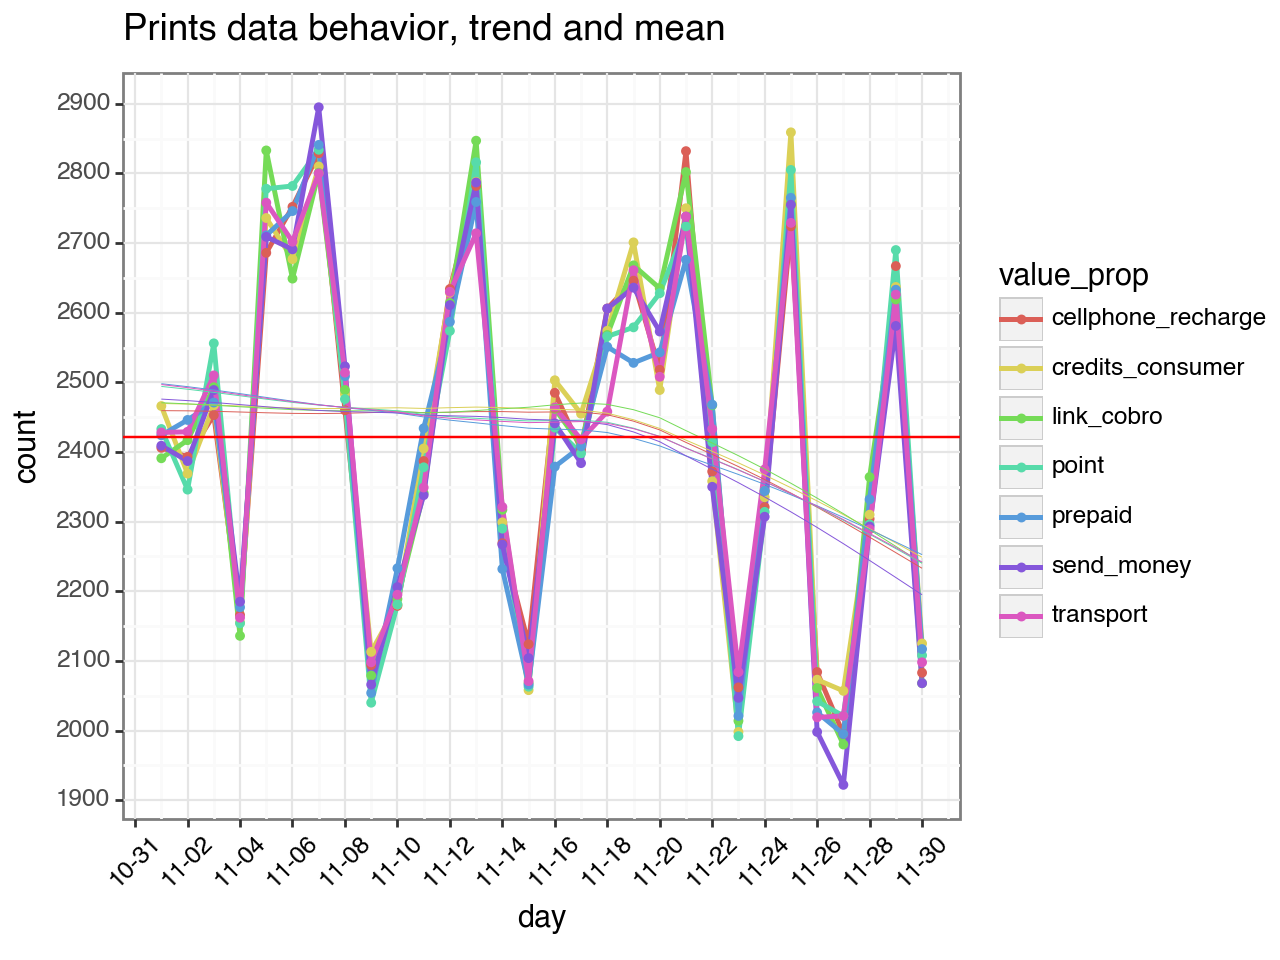

<Figure Size: (640 x 480)>

In [4]:
# Plotting Time Series with ggplot to get more information about the data
import numpy as np
from plotnine import (
    ggplot, aes, geom_line, 
    theme, element_text, scale_x_datetime,
    theme_bw, geom_smooth, geom_point, 
    ggtitle, scale_y_continuous, geom_hline
)
(
    ggplot(df_prints_count)
    + aes(x="day", y="count", color="value_prop")
    + geom_line(size=1)
    + geom_point(size=1)
    + geom_smooth(se=False, size=0.2)
    + geom_hline(
        yintercept=df_prints_count["count"].mean(),
        color="red"
    )
    + scale_y_continuous(
        breaks=np.linspace(start=0, stop=3000, num=31)
    )
    + scale_x_datetime(
        date_breaks = "2 day", date_labels="%m-%d"
    )
    + ggtitle(
        title="Prints data behavior, trend and mean"
    )
    + theme_bw()
    + theme(
        axis_text_x=element_text(
            colour="black", face="bold", angle=45, hjust=0.5
        )
    )
)

## Analysis of graphic
From this graph, the following information can be obtained from the Prints data related to the period studied (November 2020):
- There are 7 categories of value_prop
- Daily ranges are between 1900 and 2900 prints per category
- The total average (without discriminating category) of prints in this period is ~2422 prints per day per category.
- All categories of value_prop has similar behavior to each other.
- From November 18th onwards a tendency to decrease prints in all value_props begins, going down of the mean.
- It is a short analysis period to determine weekly, monthly or seasonal behavior of the data, etc. In this case, stochastic behavior is seen, but this assumption may be affected by the time window available for the analysis.